0.0
No intersection.


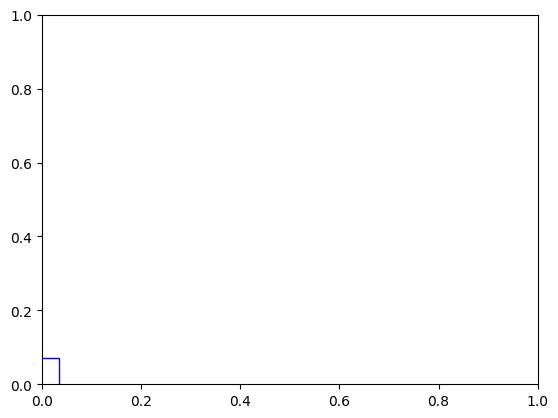

In [2]:
# Test IoU Function

from shapely.geometry import Polygon
from math import cos, sin, radians
import numpy as np
# import tensorflow as tf
import matplotlib.pyplot as plt

def rotate_box(box):
    """Calculate the four corners of a rotated box (TensorFlow)."""
    cx, cy, w, h, angle = box
    cx = (w + cx) / 2
    cy = (h + cy) / 2
    w = w - cx
    h = h - cy

    angle = radians(angle)
    dx = w / 2
    dy = h / 2
    # Calculate the four corners of the rotated rectangle
    corners = np.array([
        [cx - dx * cos(angle) + dy * sin(angle), cy - dx * sin(angle) - dy * cos(angle)],
        [cx + dx * cos(angle) + dy * sin(angle), cy + dx * sin(angle) - dy * cos(angle)],
        [cx + dx * cos(angle) - dy * sin(angle), cy + dx * sin(angle) + dy * cos(angle)],
        [cx - dx * cos(angle) - dy * sin(angle), cy - dx * sin(angle) + dy * cos(angle)]
    ])
    return corners

def polygon_area(corners):
    """Calculate the area of a polygon given its corners."""
    poly = Polygon(corners)
    return poly.area

def polygon_intersection(corners1, corners2):
    """Calculate the intersection area between two polygons."""
    poly1 = Polygon(corners1)
    poly2 = Polygon(corners2)
    inter_area = poly1.intersection(poly2).area
    return inter_area



# Define a function to plot the polygons and their intersection
def plot_polygons_and_intersection(box1, box2):
    # Calculate the corners of the two boxes
    corners1 = rotate_box(box1)
    corners2 = rotate_box(box2)
    
    # Calculate the intersection area
    inter_area = polygon_intersection(corners1, corners2)
    
    # Create a plot
    fig, ax = plt.subplots()
    
    # Plot the first box
    polygon1 = plt.Polygon(corners1, closed=True, fill=None, edgecolor='blue', label='Box 1')
    ax.add_patch(polygon1)

    # Plot the second box
    polygon2 = plt.Polygon(corners2, closed=True, fill=None, edgecolor='red', label='Box 2')
    ax.add_patch(polygon2)
    
    # Calculate the intersection corners and plot it
    intersection_poly = Polygon(corners1).intersection(Polygon(corners2))
    print(intersection_poly.area)
    if intersection_poly.is_empty:
        print("No intersection.")
        return
    intersection_corners = np.array(intersection_poly.exterior.xy).T
    intersection_polygon = plt.Polygon(intersection_corners, closed=True, color='green', alpha=0.5, label='Intersection')
    ax.add_patch(intersection_polygon)

    # Set limits and labels
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set_aspect('equal')
    ax.set_title(f'Intersection Area: {inter_area:.2f}')
    ax.legend()
    
    # Show the plot
    plt.grid()
    plt.show()

# Example boxes: (center_x, center_y, width, height, angle)
box1 = (-0.04, -0.08, 0.06, 0.12, 0.0)  # Box 1
box2 = (-1, -1, -1, -1, -1)  # Box 2

# Call the plotting function
plot_polygons_and_intersection(box1, box2)






# def box_iou_oriented(boxes1, boxes2):
#     """Compute pairwise IoU for rotated bounding boxes (TensorFlow)."""
#     batch_size_1 = tf.shape(boxes1)[0]
#     batch_size_2 = tf.shape(boxes2)[0]
    
#     iou_matrix = np.zeros((batch_size_1, batch_size_2))
    
#     for i in range(batch_size_1):
#         corners1 = rotate_box(boxes1[i].numpy())
#         area1 = polygon_area(corners1)
        
#         for j in range(batch_size_2):
#             corners2 = rotate_box(boxes2[j].numpy())
#             area2 = polygon_area(corners2)
#             inter_area = polygon_intersection(corners1, corners2)
#             union_area = area1 + area2 - inter_area
#             iou_matrix[i, j] = inter_area / union_area if union_area != 0 else 0.0
    
#     return tf.convert_to_tensor(iou_matrix, dtype=tf.float32)

(256, 512, 3)
256 512
BOXES [[-0.00986517034471035, -0.0550856813788414, 0.02549017034471035, 0.0863356813788414, 0.0], [-0.00986517034471035, -0.0550856813788414, 0.02549017034471035, 0.0863356813788414, 0.125], [-0.00986517034471035, -0.0550856813788414, 0.02549017034471035, 0.0863356813788414, 0.25], [-0.00986517034471035, -0.0550856813788414, 0.02549017034471035, 0.0863356813788414, 0.375], [-0.00986517034471035, -0.0550856813788414, 0.02549017034471035, 0.0863356813788414, 0.5], [-0.0275428406894207, -0.1257963627576828, 0.0431678406894207, 0.1570463627576828, 0.0], [-0.0275428406894207, -0.1257963627576828, 0.0431678406894207, 0.1570463627576828, 0.125], [-0.0275428406894207, -0.1257963627576828, 0.0431678406894207, 0.1570463627576828, 0.25], [-0.0275428406894207, -0.1257963627576828, 0.0431678406894207, 0.1570463627576828, 0.375], [-0.0275428406894207, -0.1257963627576828, 0.0431678406894207, 0.1570463627576828, 0.5], [-0.013838134706020355, -0.04211002588272095, 0.0294631347060

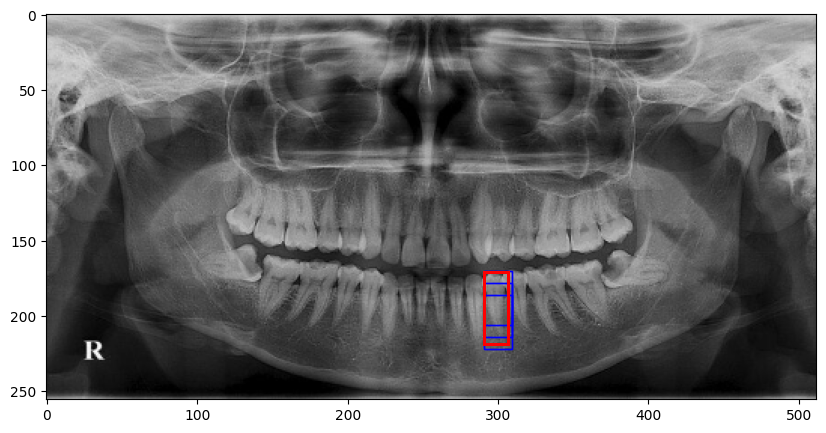

In [9]:
import copy
import torch
import torchvision
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches


def rotate_box(box):
    """Calculate the four corners of a rotated box (TensorFlow)."""
    x_min, y_min, x_max, y_max, angle = box
    cx = (x_min + x_max) * 512 / 2
    cy = (y_min + y_max) * 256 / 2
    w = ( x_max - x_min ) * 512 
    h = (y_max - y_min ) * 256 
    angle = angle * 360
    angle = radians(angle)
    dx = w / 2
    dy = h / 2
    # Calculate the four corners of the rotated rectangle
    corners = np.array([
        [cx - dx * cos(angle) + dy * sin(angle), cy - dx * sin(angle) - dy * cos(angle)],
        [cx + dx * cos(angle) + dy * sin(angle), cy + dx * sin(angle) - dy * cos(angle)],
        [cx + dx * cos(angle) - dy * sin(angle), cy + dx * sin(angle) + dy * cos(angle)],
        [cx - dx * cos(angle) - dy * sin(angle), cy - dx * sin(angle) + dy * cos(angle)]
    ])
    return corners



def multibox_prior(data, sizes, ratios, rotations=[0.0, 45.0, 90.0, 135.0, 180.0]):
  """Generate anchor boxes with different shapes centered on each pixel."""
  rotations = [angle/360  for angle in rotations] 

  in_height, in_width = data.shape[-2:]
  device, num_sizes, num_ratios = data.device, len(sizes), len(ratios)
  boxes_per_pixel = (num_sizes + num_ratios - 1)
  size_tensor = torch.tensor(sizes, device=device)
  ratio_tensor = torch.tensor(ratios, device=device)
  # Offsets are required to move the anchor to the center of a pixel. Since
  # a pixel has height=1 and width=1, we choose to offset our centers by 0.5
  offset_h, offset_w = 0.5, 0.5
  steps_h = 1.0 / in_height # Scaled steps in y axis
  steps_w = 1.0 / in_width # Scaled steps in x axis
  # Generate all center points for the anchor boxes
  center_h = (torch.arange(in_height, device=device) + offset_h) * steps_h
  center_w = (torch.arange(in_width, device=device) + offset_w) * steps_w
  shift_y, shift_x = torch.meshgrid(center_h, center_w, indexing='ij')
  shift_y, shift_x = shift_y.reshape(-1), shift_x.reshape(-1)

  # Generate `boxes_per_pixel` number of heights and widths that are later
  # used to create anchor box corner coordinates (xmin, xmax, ymin, ymax)
  w = torch.cat((size_tensor * torch.sqrt(ratio_tensor[0]), sizes[0] * torch.sqrt(ratio_tensor[1:]))) * in_height/in_width # Handle rectangular inputs
  h = torch.cat((size_tensor / torch.sqrt(ratio_tensor[0]),sizes[0] / torch.sqrt(ratio_tensor[1:]))) 

  # Divide by 2 to get half height and half width
  anchor_manipulations = torch.stack((-w, -h, w, h)).T.repeat(in_height * in_width, 1) / 2
  # Each center point will have `boxes_per_pixel` number of anchor boxes, so
  # generate a grid of all anchor box centers with `boxes_per_pixel` repeats
  out_grid = torch.stack([shift_x, shift_y, shift_x, shift_y], dim=1).repeat_interleave(boxes_per_pixel, dim=0)
  output = out_grid + anchor_manipulations
  output_unsqueezed = output.unsqueeze(0)
  # Repeat anchor boxes for each rotation
  anchor_boxes_repeated = output_unsqueezed.repeat_interleave(5, dim=1)
  # Step 2: Create a tensor for rotations
  # Step 1: Repeat anchor boxes for each rotation
  num_rotations = len(rotations)
  # print(num_rotations)
  rotations_tensor = torch.tensor(rotations, dtype=torch.float32, device= device)  # Shape: (num_rotations, 1)
  # print(anchor_boxes_repeated.shape)

  rotations_tiled = rotations_tensor.repeat(anchor_boxes_repeated.shape[1] // num_rotations)
  # print(rotations_tiled.shape)
  # Step 4: Reshape rotations_tiled to add an additional dimension for concatenation
  rotations_tiled = rotations_tiled.reshape((1, rotations_tiled.shape[0], 1))  # Shape: (1, num_rotations, 1)

  # Step 5: Concatenate the repeated anchor boxes with the tiled rotations
  x_final = torch.cat([anchor_boxes_repeated, rotations_tiled], dim=2)  # Concatenate along the channel dimension
  return x_final


def parse_label_file(label_file):
    boxes = []
    with open(label_file, 'r') as file:
        for line in file:
            if line.strip() and not line.strip().endswith(':'):
                values = list(map(float, line.strip().split(',')))
                class_id, x_min, y_min, x_max, y_max, rotation = values
                boxes.append([class_id, x_min, y_min, x_max, y_max, rotation])
    return boxes

# Padding function
def pad_labels(labels, max_boxes):
    pad_size = max_boxes - len(labels)
    if pad_size > 0:
        padding = torch.full((pad_size, len(labels[0])), -1.0)
        labels = torch.cat([torch.tensor(labels), padding], dim=0)
    else:
        labels = torch.tensor(labels[:max_boxes])
    return labels

# Load and pad label
label = parse_label_file('./images/23.txt')
label = pad_labels(label, max_boxes =  33)

IMG_HEIGHT = 256
IMG_WIDTH = 512
image = torchvision.io.read_image('rgb_images/23.jpg').float() 
original_width, original_height = image.shape[2], image.shape[1]
resize_transform = torchvision.transforms.Resize((IMG_HEIGHT, IMG_WIDTH))
image = resize_transform(image)
image = image.permute(1,2,0) / 255.0


# Scale bounding boxes
scale_width = IMG_WIDTH / original_width
scale_height = IMG_HEIGHT / original_height
for gt_box in label:
    if gt_box[0] != -1:
      gt_box[1] = (gt_box[1] * scale_width) / IMG_WIDTH
      gt_box[2] = (gt_box[2] * scale_height) / IMG_HEIGHT
      gt_box[3] = (gt_box[3] * scale_width) / IMG_WIDTH
      gt_box[4] = (gt_box[4] * scale_height) / IMG_HEIGHT
      gt_box[5] = gt_box[5] / 360    # Normalize rotation


# print('LABLE', label)

img_copy = np.copy(image)
print(img_copy.shape)
h, w = img_copy.shape[:2]
print(h, w)

def display_anchors(img, fmap_w, fmap_h, s, label):
    img_copy = copy.deepcopy(img)  # Create a fresh copy of the original image
    fmap = torch.zeros((1, 10, fmap_h, fmap_w))
    anchors = multibox_prior(fmap, sizes=s, ratios=[0.5, 0.75, 1])
    # bbox_scale = torch.tensor((w, h, w, h, 360))
    boxes = anchors.squeeze(0)
    # bbox_scale = bbox_scale.repeat((boxes.shape[0], 1))
    # boxes *= bbox_scale
    # print(boxes)
    boxes = boxes.tolist()
    print('BOXES', boxes)
    # print(boxes)
    # label *= bbox_scale
    # print(label.shape)
    labels = label.tolist()
    print('LABELS', labels)
    # for box in boxes[len(boxes) // 2: len(boxes)//2 + 4]:
    #     draw_rotated_box(img_copy, box, color=(255, 0, 0), thickness=2)
    # Display the image with all bounding boxes
    fig, ax = plt.subplots(figsize=(10, 5))  # Adjust width and height as needed
    # print(labels[3])
    corners2 = rotate_box(labels[3])
    # corners1 = rotate_box(boxes[1500])
    # print(corners2)
    # polygon1 = patches.Polygon(corners1, closed=True, edgecolor='red', linewidth=2, facecolor='none')
    ax.imshow(img_copy)
    polygon2 = patches.Polygon(corners2, closed=True, edgecolor='red', linewidth=2, facecolor='none')
    # ax.imshow(img_copy)
    for box in boxes:
    #     # Calculate the corners of the two boxes
        # for label in labels:
            corners1 = rotate_box(box)
            corners2 = rotate_box(labels[9])

            polygon1 = patches.Polygon(corners1, closed=True, fill=None, edgecolor='blue', label='Box 1')
            polygon2 = patches.Polygon(corners2, closed=True, edgecolor='red', linewidth=2, facecolor='none')
            # polygon3 = patches.Polygon(corners2, closed=True, edgecolor='red', linewidth=2, facecolor='none')

        #     # Calculate the intersection area
            inter_area = polygon_intersection(corners1, corners2)
            

            area1 = polygon_area(corners1)
            area2 = polygon_area(corners2)
            union_area = area1 + area2 - inter_area
            if union_area != 0:
                iou = inter_area / union_area
            ax.add_patch(polygon2)
            if iou > 0.5:
                print(iou)
                ax.add_patch(polygon1)


    # ax.add_patch(intersection_polygon)
    plt.axis('on')
    plt.show()

display_anchors(img_copy, fmap_w=64, fmap_h=32, s=[0.1, 0.2], label=label[:,1:])
# display_anchors(img_copy, fmap_w=32, fmap_h=16, s=[0.2, 0.3], label=label[:,1:])
# display_anchors(img_copy, fmap_w=16, fmap_h=8, s=[0.3, 0.4], label=label[:,1:])
# display_anchors(img_copy, fmap_w=8, fmap_h=4, s=[0.4, 0.5], label=label[:,1:])

In [ ]:
# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device = 'cpu'

In [ ]:
def box_center_to_corner(boxes):
  """Convert from (center, width, height) to (upper-left, lower-right)."""
  cx, cy, w, h = boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3]
  x1 = cx - 0.5 * w
  y1 = cy - 0.5 * h
  x2 = cx + 0.5 * w
  y2 = cy + 0.5 * h
  boxes = torch.stack((x1, y1, x2, y2), axis=-1)
  return boxes

In [ ]:

def box_corner_to_center(boxes): # boxes have the shape = (n, 5) , n is the number of bounding boxes
  """Convert from (upper-left, lower-right) to (center, width, height)."""
  x1, y1, x2, y2 = boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3]
  cx = (x1 + x2) / 2
  cy = (y1 + y2) / 2
  w = x2 - x1
  h = y2 - y1
  boxes = torch.stack((cx, cy, w, h), axis=-1)
  return boxes

In [ ]:
def box_iou_oriented(boxes1, boxes2):
    """Compute pairwise IoU for rotated bounding boxes (TensorFlow)."""
    batch_size_1 = boxes1.shape[0]
    batch_size_2 = boxes2.shape[0]
    
    iou_matrix = np.zeros((batch_size_1, batch_size_2))
    
    for i in range(batch_size_1):
        corners1 = rotate_box(boxes1[i].cpu().numpy())
        area1 = polygon_area(corners1)
        
        for j in range(batch_size_2):
            corners2 = rotate_box(boxes2[j].cpu().numpy())
            area2 = polygon_area(corners2)
            inter_area = polygon_intersection(corners1, corners2)
            union_area = area1 + area2 - inter_area
            iou_matrix[i, j] = inter_area / union_area if union_area != 0 else 0.0
    
    return torch.tensor(iou_matrix, dtype=torch.float64, device=device)

In [ ]:
def assign_anchor_to_bbox(ground_truth, anchors, device, iou_threshold=0.5):
  """Assign closest ground-truth bounding boxes to anchor boxes."""
  num_anchors, num_gt_boxes = anchors.shape[0], ground_truth.shape[0]
  # Element x_ij in the i-th row and j-th column is the IoU of the anchor
  # box i and the ground-truth bounding box j
  jaccard = box_iou_oriented(anchors, ground_truth)
  # Initialize the tensor to hold the assigned ground-truth bounding box for
  # each anchor
  anchors_bbox_map = torch.full((num_anchors,), -1, dtype=torch.long,
  device=device)
  # Assign ground-truth bounding boxes according to the threshold
  max_ious, indices = torch.max(jaccard, dim=1)
  anc_i = torch.nonzero(max_ious >= iou_threshold).reshape(-1)
  box_j = indices[max_ious >= iou_threshold]
  anchors_bbox_map[anc_i] = box_j
  col_discard = torch.full((num_anchors,), -1)
  row_discard = torch.full((num_gt_boxes,), -1)
  for _ in range(num_gt_boxes):
    max_idx = torch.argmax(jaccard) # Find the largest IoU
    box_idx = (max_idx % num_gt_boxes).long()
    anc_idx = (max_idx / num_gt_boxes).long()
    anchors_bbox_map[anc_idx] = box_idx
    jaccard[:, box_idx] = col_discard
    jaccard[anc_idx, :] = row_discard
  return anchors_bbox_map

In [ ]:
# Labeling Classes and Offsets
def offset_boxes(anchors, assigned_bb, eps=1e-6):
    """Transform for anchor box offsets."""
    c_anc = box_corner_to_center(anchors[:,:4]) # Feed the first 4 coordinates to the function(x_min, y_min, x_max, y_max)
    c_assigned_bb = box_corner_to_center(assigned_bb[:,:4])
    # Feed the first 4 coordinates to the function(x_min, y_min, x_max, y_max)
    offset_xy = 10 * (c_assigned_bb[:, :2] - c_anc[:, :2]) / c_anc[:, 2:]
    offset_wh =  5 * torch.log(eps + c_assigned_bb[:, 2:] / c_anc[:, 2:])

    offset = torch.cat([offset_xy, offset_wh], dim=1)

    anchor_angles = anchors[:, -1]
    assigned_angles = assigned_bb[:, -1]
    offset_angle = assigned_angles - anchor_angles
    # print(offset_xy)
    # print(offset_wh)
    # print(offset_angle)
    offset = torch.cat([offset_xy, offset_wh, offset_angle.unsqueeze(dim=1)], axis=1)
    return offset

In [ ]:
def multibox_target(anchors, labels):
  """Label anchor boxes using ground-truth bounding boxes."""
  batch_size, anchors = labels.shape[0], anchors.squeeze(0)
  batch_offset, batch_mask, batch_class_labels = [], [], []
  device, num_anchors = anchors.device, anchors.shape[0]
  for i in range(batch_size):
    label = labels[i, :, :]
    anchors_bbox_map = assign_anchor_to_bbox(label[:, 1:], anchors, device)
    print(anchors_bbox_map)
    print((anchors_bbox_map >= 0).float())
    print((anchors_bbox_map >= 0).float().unsqueeze(-1))
    bbox_mask = ((anchors_bbox_map >= 0).float().unsqueeze(-1)).repeat(1, 5)
    print(bbox_mask.shape)
    print(bbox_mask.reshape(-1).shape)
    # Initialize class labels and assigned bounding box coordinates with
    # zeros
    class_labels = torch.zeros(num_anchors, dtype=torch.long,device=device)
    assigned_bb = torch.zeros((num_anchors, 5), dtype=torch.float32,device=device)
    # Label classes of anchor boxes using their assigned ground-truth
    # bounding boxes. If an anchor box is not assigned any, we label its
    # class as background (the value remains zero)
    indices_true = torch.nonzero(anchors_bbox_map >= 0)
    bb_idx = anchors_bbox_map[indices_true]
    class_labels[indices_true] = label[bb_idx, 0].long() + 1
    assigned_bb[indices_true] = label[bb_idx, 1:]
    # Offset transformation
    # print(offset_boxes(anchors, assigned_bb))
    offset = offset_boxes(anchors, assigned_bb) * bbox_mask
    # print(offset)
    # print(offset.shape)
    # print(offset.reshape(-1).shape)
    batch_offset.append(offset.reshape(-1))
    batch_mask.append(bbox_mask.reshape(-1))
    batch_class_labels.append(class_labels)
    print(f'Batch number: {i}\n')
    
  bbox_offset = torch.stack(batch_offset)
  bbox_mask = torch.stack(batch_mask)
  class_labels = torch.stack(batch_class_labels)
  return (bbox_offset, bbox_mask, class_labels)

print(device)
fmap = torch.zeros((1, 10,  16, 32), device=device)
anchors = multibox_prior(fmap, sizes=[0.1,0.15,0.2], ratios=[0.5,0.75,1])

bbox_offset, bbox_mask, class_labels = multibox_target(anchors, label.unsqueeze(0).to(device=device))


In [ ]:
anchors

In [ ]:
bbox_offset

In [ ]:
print(anchors.shape)
print(bbox_offset.shape)
print(bbox_mask.shape)
print(bbox_mask.reshape(1,-1,5))

In [ ]:
# print(anchors)
print(bbox_mask.reshape(1,-1,5))

anchors_assigned = anchors * bbox_mask.reshape(1,-1,5)
print(anchors)
anchors_assigned

In [ ]:
img_copy = copy.deepcopy(img_copy)  # Create a fresh copy of the original image
fmap = torch.zeros((1, 10, 16, 32))
# anchors = multibox_prior(fmap, sizes=s, ratios=[0.5, 2, 1])
# bbox_scale = torch.tensor((w, h, w, h, 360))
boxes = anchors_assigned.squeeze(0)
# bbox_scale = bbox_scale.repeat((boxes.shape[0], 1))
# boxes *= bbox_scale
# print(boxes)
boxes = boxes.tolist()
print('BOXES', boxes)
# print(boxes)
# label *= bbox_scale
# print(label.shape)
labels = label[:,1:]
labels = labels.tolist()
print('LABELS', labels)
# for box in boxes[len(boxes) // 2: len(boxes)//2 + 4]:
#     draw_rotated_box(img_copy, box, color=(255, 0, 0), thickness=2)
# Display the image with all bounding boxes
fig, ax = plt.subplots(figsize=(10, 5))  # Adjust width and height as needed
# print(labels[3])
print(len(labels[3]))
corners2 = rotate_box(labels[3])
# corners1 = rotate_box(boxes[1500])
# print(corners2)
# polygon1 = patches.Polygon(corners1, closed=True, edgecolor='red', linewidth=2, facecolor='none')
ax.imshow(img_copy)
polygon2 = patches.Polygon(corners2, closed=True, edgecolor='red', linewidth=2, facecolor='none')
# ax.imshow(img_copy)
for box in boxes:
#     # Calculate the corners of the two boxes
    for label in labels:
        corners1 = rotate_box(box)
        corners2 = rotate_box(label)

        polygon1 = patches.Polygon(corners1, closed=True, fill=None, edgecolor='blue', label='Box 1')
        polygon2 = patches.Polygon(corners2, closed=True, edgecolor='red', linewidth=2, facecolor='none')
        # polygon3 = patches.Polygon(corners2, closed=True, edgecolor='red', linewidth=2, facecolor='none')

    #     # Calculate the intersection area
        inter_area = polygon_intersection(corners1, corners2)
        

        area1 = polygon_area(corners1)
        area2 = polygon_area(corners2)
        
        # ax.add_patch(polygon1)
        # ax.add_patch(polygon2)
        # iou = inter_area / (area1 + area2 - inter_area)
                #     # Calculate the intersection area
        inter_area = polygon_intersection(corners1, corners2)
        

        area1 = polygon_area(corners1)
        area2 = polygon_area(corners2)
        union_area = area1 + area2 - inter_area
        if union_area != 0:
            iou = inter_area / union_area
        ax.add_patch(polygon2)
        if iou:
            print(iou)
            ax.add_patch(polygon1)
        # if iou:
        #     print(iou)


# ax.add_patch(intersection_polygon)
plt.axis('on')
plt.show()

In [ ]:
def offset_inverse(anchors, offset_preds):
  """Predict bounding boxes based on anchor boxes with predicted offsets."""
  anc = box_corner_to_center(anchors[:,:4])
  pred_bbox_xy = (offset_preds[:, :2] * anc[:, 2:] / 10) + anc[:, :2]
  pred_bbox_wh = torch.exp(offset_preds[:, 2:4] / 5) * anc[:, 2:]
  pred_bbox = torch.cat((pred_bbox_xy, pred_bbox_wh), axis=1)
  predicted_bbox = box_center_to_corner(pred_bbox)

  pred_bbox_angle = anchors[:, -1] + offset_preds[:, -1] 
  
  # Concatenate predicted bounding box with predicted angle
  predicted_bbox_with_angle = torch.cat([predicted_bbox, pred_bbox_angle.unsqueeze(dim=1)], axis=1)
  return predicted_bbox_with_angle

In [ ]:
anchors_assigned.shape

In [ ]:
bbox_offset.shape
bbox_offset = bbox_offset.reshape(-1,5)

In [ ]:
bbox_offset

In [ ]:
# check offset_inverse
predicted_bbox_with_angle = offset_inverse(anchors=anchors_assigned.squeeze(0), offset_preds=bbox_offset)
print(predicted_bbox_with_angle)

In [ ]:
img_copy

In [ ]:
# labels = label[:,1:]
# labels = labels.tolist()
print('LABELS', labels)

boxes = predicted_bbox_with_angle
boxes = predicted_bbox_with_angle.squeeze(0)
# bbox_scale = bbox_scale.repeat((boxes.shape[0], 1))
# boxes *= bbox_scale
boxes = boxes.tolist()
print(boxes)
fig, ax = plt.subplots(figsize=(10, 5))  # Adjust width and height as needed
# print(labels[3])
print(len(labels[3]))
corners2 = rotate_box(labels[3])
# corners1 = rotate_box(boxes[1500])
# print(corners2)
# polygon1 = patches.Polygon(corners1, closed=True, edgecolor='red', linewidth=2, facecolor='none')
ax.imshow(img_copy)
polygon2 = patches.Polygon(corners2, closed=True, edgecolor='red', linewidth=2, facecolor='none')
# ax.imshow(img_copy)
for box in boxes:
#     # Calculate the corners of the two boxes
    for label in labels:
        corners1 = rotate_box(box)
        corners2 = rotate_box(label)

        polygon1 = patches.Polygon(corners1, closed=True, fill=None, edgecolor='blue', label='Box 1')
        polygon2 = patches.Polygon(corners2, closed=True, edgecolor='red', linewidth=2, facecolor='none')
        # polygon3 = patches.Polygon(corners2, closed=True, edgecolor='red', linewidth=2, facecolor='none')

    #     # Calculate the intersection area
        inter_area = polygon_intersection(corners1, corners2)
        

        area2 = polygon_area(corners2)
        area1 = polygon_area(corners1)
        
        # ax.add_patch(polygon1)
        # ax.add_patch(polygon2)
        # iou = inter_area / (area1 + area2 - inter_area)
                #     # Calculate the intersection area
        inter_area = polygon_intersection(corners1, corners2)
        

        area1 = polygon_area(corners1)
        area2 = polygon_area(corners2)
        union_area = area1 + area2 - inter_area
        if union_area != 0:
            iou = inter_area / union_area
        if iou > 0.5:
            print(iou)
            ax.add_patch(polygon1)
        # ax.add_patch(polygon2)
        # if iou:
        #     print(iou)


# ax.add_patch(intersection_polygon)
plt.axis('on')
plt.show()

In [ ]:
def nms(boxes, scores, iou_threshold):
  """Sort confidence scores of predicted bounding boxes."""
  B = torch.argsort(scores, dim=-1, descending=True)
  keep = [] # Indices of predicted bounding boxes that will be kept
  # print('B:\n')
  # print(B)
  # print(f'boxes:\n{boxes}')
  # print(f'scores:\n{scores}')
  # print(f'iou_threshold:\n{iou_threshold}')
  while B.numel() > 0:
    i = B[0]
    # print(f'B[0] = i:\n{i}')
    keep.append(i)
    if B.numel() == 1: break
    # print('boxes[i, :].reshape(-1, 4):\n')
    # print(boxes[i, :].reshape(-1, 4))
    # print('boxes[B[1:], :].reshape(-1, 4):\n' )
    # print(boxes[B[1:], :].reshape(-1, 4))
    iou = box_iou_oriented(boxes[i, :].reshape(-1, 5).detach(), boxes[B[1:], :].reshape(-1, 5).detach()).reshape(-1)
    inds = torch.nonzero(iou <= iou_threshold).reshape(-1)
    # print('iou:\n' )
    # print(iou)
    # print('inds:\n')
    # print(inds)
    
    B = B[inds + 1]
    # print('B[inds + 1]:\n')
    # print(B)
  
  # print('returned value --> keep:')
  # print(keep)
  return torch.tensor(keep, device=boxes.device)

In [ ]:
def multibox_detection(cls_probs, offset_preds, anchors, nms_threshold=0.5,
pos_threshold=0.009999999):
  """Predict bounding boxes using non-maximum suppression."""
  device, batch_size = cls_probs.device, cls_probs.shape[0]
  anchors = anchors.squeeze(0)
  num_classes, num_anchors = cls_probs.shape[1], cls_probs.shape[2]
  out = []
  for i in range(batch_size):
    cls_prob, offset_pred = cls_probs[i], offset_preds[i].reshape(-1, 5)
    conf, class_id = torch.max(cls_prob[1:], 0)
    predicted_bb = offset_inverse(anchors, offset_pred)
    keep = nms(predicted_bb, conf, nms_threshold)
    # Find all non-`keep` indices and set the class to background
    all_idx = torch.arange(num_anchors, dtype=torch.long, device=device)
    combined = torch.cat((keep, all_idx))
    uniques, counts = combined.unique(return_counts=True)
    non_keep = uniques[counts == 1]
    all_id_sorted = torch.cat((keep, non_keep))
    class_id[non_keep] = -1
    class_id = class_id[all_id_sorted]
    conf, predicted_bb = conf[all_id_sorted], predicted_bb[all_id_sorted]
    # Here `pos_threshold` is a threshold for positive (non-background)
    # predictions
    below_min_idx = (conf < pos_threshold)
    class_id[below_min_idx] = -1
    conf[below_min_idx] = 1 - conf[below_min_idx]
    pred_info = torch.cat((class_id.unsqueeze(1),conf.unsqueeze(1),predicted_bb), dim=1)
    out.append(pred_info)
  return torch.stack(out)

print(bbox_offset.shape)
print(anchors.shape)
cls_probs = torch.tensor([[0] * anchors.shape[1], [0.8] * anchors.shape[1]], device = device)
print(cls_probs.shape)
output = multibox_detection(cls_probs.unsqueeze(dim=0), bbox_offset.unsqueeze(dim=0), anchors.unsqueeze(dim=0), nms_threshold=0.5,
pos_threshold=0.009999999)